In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import glob
import os

plt.style.use('ggplot') # Make the graphs a bit prettier

In [2]:
data = {}

for path in glob.glob(os.path.expanduser("~/dev/ma/data/results/dlm_scaling/*.json")):
  for typename, items in json.load(open(path)).items():
    if typename in data:
      data[typename].update(items)
    else:
      data[typename] = items

frames = { typename: pd.DataFrame.from_dict(items, orient='index') for typename, items in data.items() }

In [3]:
frames['program_run']['worker_label'] = frames['program_run']['hosts'].map(str) + 'x' + frames['program_run']['workers_per_host'].map(str)
frames['program_run']

,max_iterations,local_moving_node_ratio,total_workers,binary,node_count,edge_count,hosts,graph,commit,timestamp,workers_per_host,job_id,local_moving_stopping_criterion,worker_label
0042b5fa-c247-4581-8c2a-2730d13c1335,32,4,2,/home/kit/iti/kp0036/code/prototypes/thrill_lo...,10000000,1320354525,2,/home/kit/iti/kp0036/graphs/mu-04/graph_50_100...,8a2aba3cd53c7249814f728775fa4b30f687c968,2017-05-12 17:42:32 +0200,1,bf594222-e8fb-4a3c-8170-065490c7a957,moved_count,2x1
0575b3aa-ce9a-43d0-931c-ab77f76d6129,32,4,32,/home/kit/iti/kp0036/code/prototypes/thrill_lo...,100000000,13203573605,8,/home/kit/iti/kp0036/graphs/mu-04/graph_50_100...,8a2aba3cd53c7249814f728775fa4b30f687c968,2017-05-12 17:42:31 +0200,4,f0cd619f-527c-463d-bc95-5d081b2eddf3,moved_count,8x4
1282a96e-6b3c-42c2-bd2a-e2f99d1decb9,32,4,8,/home/kit/iti/kp0036/code/prototypes/thrill_lo...,100000000,13203573605,8,/home/kit/iti/kp0036/graphs/mu-04/graph_50_100...,8a2aba3cd53c7249814f728775fa4b30f687c968,2017-05-12 17:42:31 +0200,1,27a0e6f4-b815-4f93-a1a4-b78b0b4a2fcd,moved_count,8x1
153f86e4-4cae-4efa-9bdd-9e3c840ada96,32,4,32,/home/kit/iti/kp0036/code/prototypes/thrill_lo...,1000000,132018381,2,/home/kit/iti/kp0036/graphs/mu-04/graph_50_100...,8a2aba3cd53c7249814f728775fa4b30f687c968,2017-05-12 17:42:31 +0200,16,d1afe869-9f1c-4c2c-aa39-c4e83c9899e0,moved_count,2x16
1a14a850-bcf3-4975-a8fa-0a7d0e43c2e4,32,4,8,/home/kit/iti/kp0036/code/prototypes/thrill_lo...,10000000,1320354525,2,/home/kit/iti/kp0036/graphs/mu-04/graph_50_100...,8a2aba3cd53c7249814f728775fa4b30f687c968,2017-05-12 17:42:31 +0200,4,9e878a3a-8ceb-4668-b758-f54fe7b9419d,moved_count,2x4
25c1a19d-662d-4c77-bd73-e155f25b6c37,32,4,8,/home/kit/iti/kp0036/code/prototypes/thrill_lo...,10000000,1320354525,8,/home/kit/iti/kp0036/graphs/mu-04/graph_50_100...,8a2aba3cd53c7249814f728775fa4b30f687c968,2017-05-12 17:42:30 +0200,1,30c94629-1203-4231-ba8a-15b9b7d7649f,moved_count,8x1
271f5da4-9294-45a9-876a-74526bdac779,32,4,1,/home/kit/iti/kp0036/code/prototypes/thrill_lo...,1000000,132018381,1,/home/kit/iti/kp0036/graphs/mu-04/graph_50_100...,8a2aba3cd53c7249814f728775fa4b30f687c968,2017-05-12 17:42:31 +0200,1,229349ae-5c17-4db3-aafa-40bcaf446a73,moved_count,1x1
3322f969-3132-4530-9761-caf37de8b837,32,4,256,/home/kit/iti/kp0036/code/prototypes/thrill_lo...,100000000,13203573605,16,/home/kit/iti/kp0036/graphs/mu-04/graph_50_100...,8a2aba3cd53c7249814f728775fa4b30f687c968,2017-05-12 17:42:32 +0200,16,a5b8ff94-bd64-4b17-b0c9-167f353c24ef,moved_count,16x16
4981715a-9733-4133-8b8d-f94170b2f2cc,32,4,216,/home/kit/iti/kp0036/code/prototypes/thrill_lo...,100000000,13203573605,8,/home/kit/iti/kp0036/graphs/mu-04/graph_50_100...,8a2aba3cd53c7249814f728775fa4b30f687c968,2017-05-12 17:42:31 +0200,27,5ac8e779-5c4c-4b34-93b3-20a90bbdaf3c,moved_count,8x27
5bf58803-a9e9-4c6a-8015-9b6fa48a157d,32,4,32,/home/kit/iti/kp0036/code/prototypes/thrill_lo...,10000000,1320354525,2,/home/kit/iti/kp0036/graphs/mu-04/graph_50_100...,8a2aba3cd53c7249814f728775fa4b30f687c968,2017-05-12 17:42:30 +0200,16,fbf378eb-992f-46eb-a0e0-4f3ef04894db,moved_count,2x16


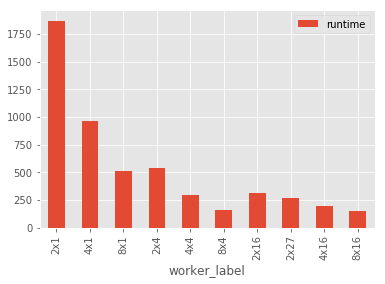

In [4]:
frames['algorithm_run'] \
    .merge(frames['program_run'], left_on='program_run_id', right_index=True) \
    .loc[lambda x: x.node_count == 10000000] \
    .sort_values(by='total_workers') \
    .plot.bar(x='worker_label', y='runtime')

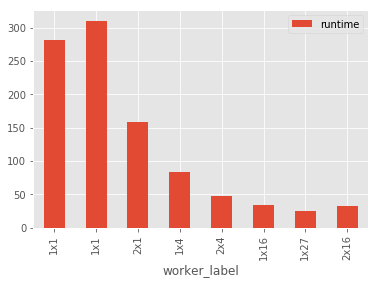

In [5]:
frames['algorithm_run'] \
    .merge(frames['program_run'], left_on='program_run_id', right_index=True) \
    .loc[lambda x: x.node_count == 1000000] \
    .sort_values(by='total_workers') \
    .plot.bar(x='worker_label', y='runtime')

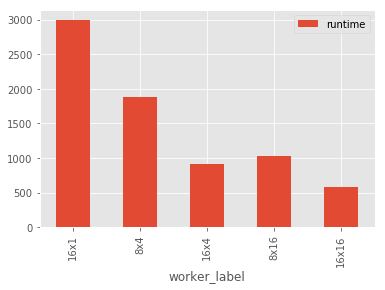

In [6]:
frames['algorithm_run'] \
    .merge(frames['program_run'], left_on='program_run_id', right_index=True) \
    .loc[lambda x: x.node_count == 100000000] \
    .sort_values(by='total_workers') \
    .plot.bar(x='worker_label', y='runtime')